In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('50_Startups.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [3]:
data.describe()

,RND,ADMIN,MKT,PROFIT
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [4]:
print("Shape of data is : ", data.shape)

Shape of data is :  (50, 5)


In [5]:
data.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [6]:
data.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
xx = data[['PROFIT']]

In [9]:
sc = StandardScaler()

x = sc.fit_transform(xx)

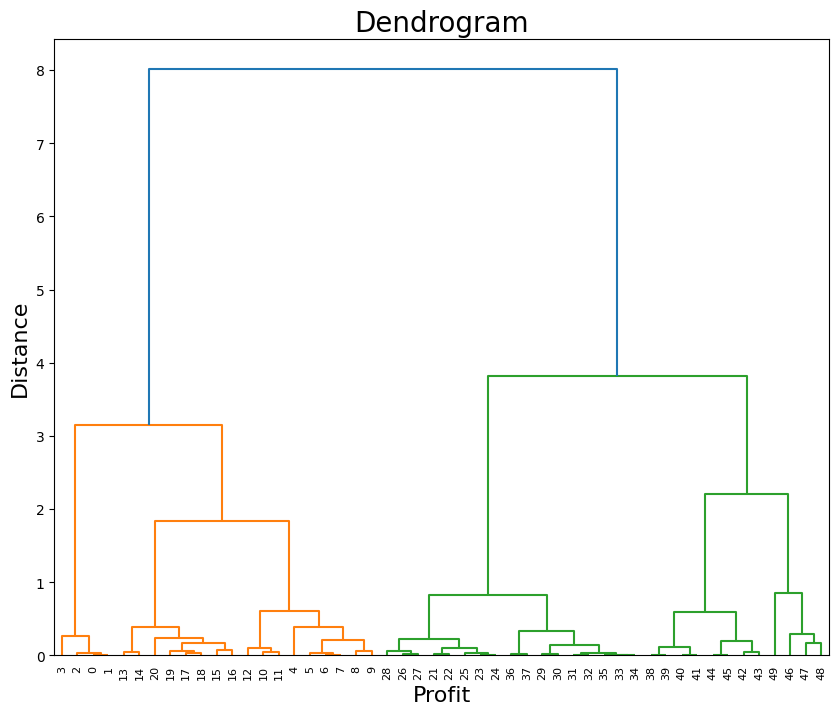

In [12]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 8))
plt.title('Dendrogram', fontsize=20)
plt.xlabel('Profit', fontsize=16)
plt.ylabel('Distance', fontsize=16)
dend = shc.dendrogram(shc.linkage(x, method='ward'))

In [13]:
# here, by visualization, we can conclude that the clusters are 2

In [36]:
cluster = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage='ward')

In [37]:
pred = cluster.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [38]:
pred

array([3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [39]:
data['cluster'] = pred

In [40]:
data.head()

,RND,ADMIN,MKT,STATE,PROFIT,cluster
0,165349.20,136897.80,471784.10,New York,192261.83,3
1,162597.70,151377.59,443898.53,California,191792.06,3
2,153441.51,101145.55,407934.54,Florida,191050.39,3
3,144372.41,118671.85,383199.62,New York,182901.99,3
4,142107.34,91391.77,366168.42,Florida,166187.94,1


In [41]:
print("Number of clusters are : \n", data['cluster'].value_counts())

Number of clusters are : 
 1    17
2    17
0    12
3     4
Name: cluster, dtype: int64


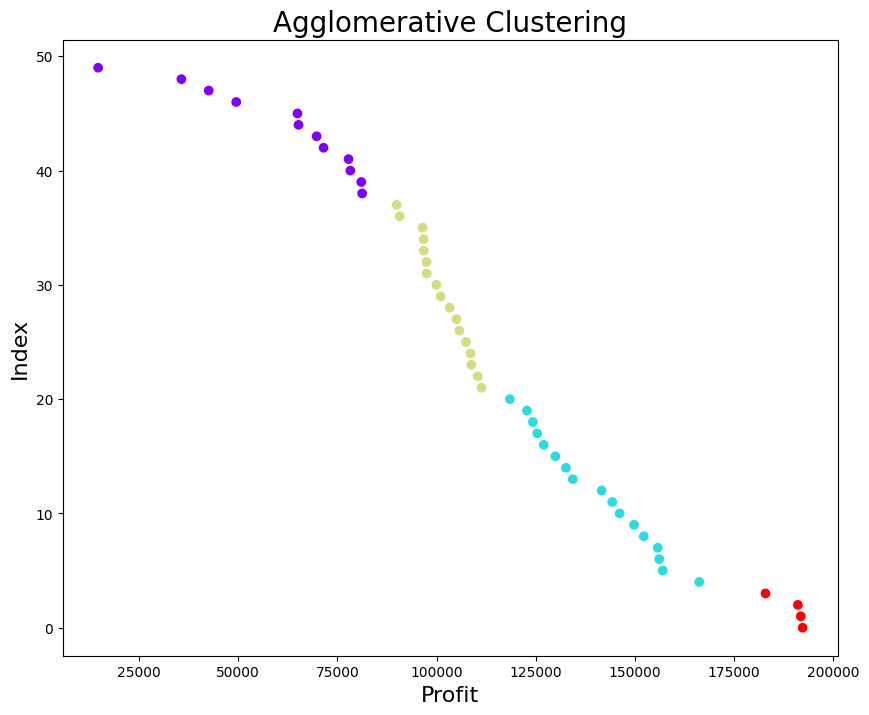

In [43]:
plt.figure(figsize=(10, 8))
plt.scatter(xx, xx.index, c = data['cluster'], cmap='rainbow')
plt.title('Agglomerative Clustering', fontsize=20)
plt.xlabel('Profit', fontsize=16)
plt.ylabel('Index', fontsize=16)
plt.show()

# **Just Tried for Demonstration Purpose**

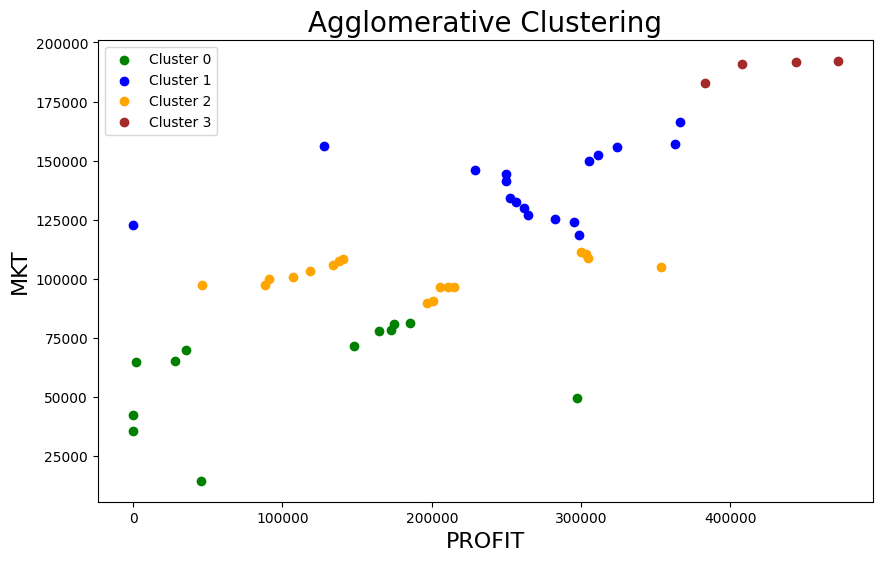

In [47]:
x = data[['MKT', 'PROFIT']].values
pred = data['cluster'].values

plt.figure(figsize=(10, 6))
plt.scatter(x[pred == 0, 0], x[pred == 0, 1], c = 'green', marker='o', label='Cluster 0')
plt.scatter(x[pred == 1, 0], x[pred == 1, 1], c = 'blue', marker='o', label='Cluster 1')
plt.scatter(x[pred == 2, 0], x[pred == 2, 1], c = 'orange', marker='o', label='Cluster 2')
plt.scatter(x[pred == 3, 0], x[pred == 3, 1], c = 'brown', marker='o', label='Cluster 3')

plt.xlabel('PROFIT', fontsize=16)
plt.ylabel('MKT', fontsize=16)
plt.title('Agglomerative Clustering', fontsize=20)
plt.legend()
plt.show()